In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('apple_quality.csv')
df = df[:-1] # Remove the last row
df.drop('A_id', axis=1, inplace=True) # Drop the 'A_id' column as it seems to be an identifier
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [3]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.1+ KB


In [4]:
# Display summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [5]:
# Convert the 'Acidity' column to float
df.Acidity = df.Acidity.astype(float)

In [6]:
# Display updated summary statistics after converting 'Acidity' to float
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [7]:
# Display the count of each class in the 'Quality' column
df.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [8]:
# Map 'good' to 1 and 'bad' to 0 in the 'Quality' column
df.Quality = df.Quality.map({'good': 1, 'bad': 0})

In [9]:
# Display the count of each class in the 'Quality' column
df.Quality.value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

<Axes: >

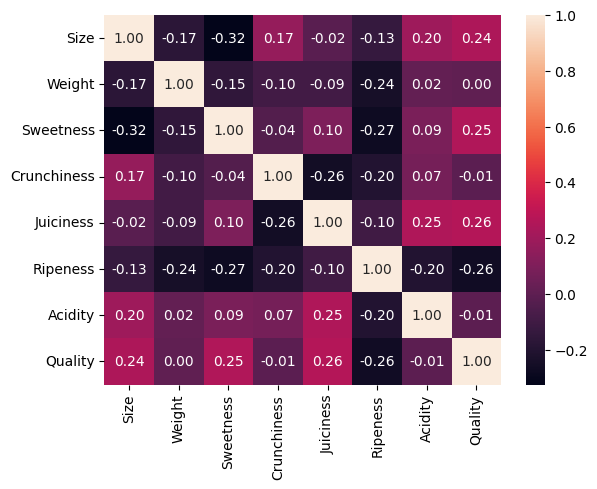

In [10]:
# Display a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [11]:
# Prepare features (X) and target variable (y)
X = df.drop('Quality', axis=1)
y = df.Quality

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42
)


In [12]:
# Train a Logistic Regression model
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Evaluate and print the accuracy of the model on the test set
logReg.score(X_test, y_test)

0.7533333333333333

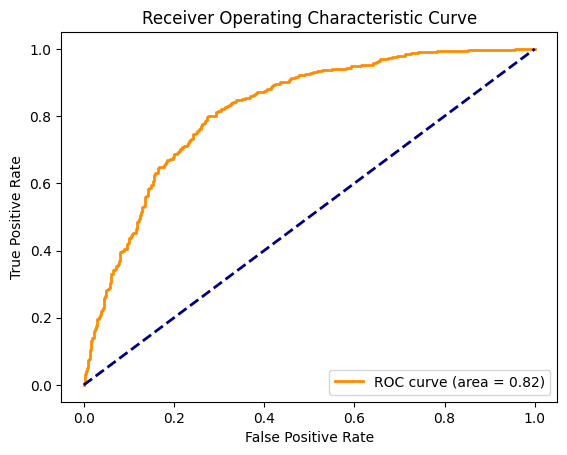

In [14]:
# Plot the Receiver Operating Characteristic (ROC) curve
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()